## Problem Statement and Goal

The objective of this notebook is to build a machine learning regression model to
predict house prices based on key property features such as living area size,
number of bedrooms, number of bathrooms, and city location.

The goal of this task is to load and preprocess the housing dataset, handle
categorical variables using encoding techniques, split the data into training
and testing sets, and train a regression model capable of accurately predicting
house prices. This analysis demonstrates the application of supervised learning
techniques to real-world real estate data.


Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor


Load Dataset

In [2]:
# Load dataset

df = pd.read_csv(r"C:\Users\user\Desktop\data.csv")

Data Inspection 

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
# Display basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Feature Selection

In [6]:
features = ['sqft_living', 'bedrooms', 'bathrooms', 'city']
target = 'price'

X = df[features]
y = df[target]


Preprocessing

Numerical features → passed directly
Categorical features → One-Hot Encoding

In [7]:
num_features = ['sqft_living', 'bedrooms', 'bathrooms']
cat_features = ['city']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)
y = np.log1p(df['price'])

'''A logarithmic transformation was applied to house prices to reduce skewness 
and minimize the impact of outliers. Predictions were converted back to the original 
price scale using the inverse transformation for meaningful evaluation.'''


Train Test Splitting

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Model Definition

In [9]:
model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)


In [10]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])


Model Training

In [11]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['sqft_living', 'bedrooms',
                                                   'bathrooms']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['city'])])),
                ('model',
                 GradientBoostingRegressor(n_estimators=200, random_state=42))])

Model Evaluation

In [12]:
y_pred = pipeline.predict(X_test)


In [15]:

# Convert predictions back to original price scale
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred)

# Evaluate on original price scale
mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 196429.24
Root Mean Squared Error (RMSE): 999185.91


Visualization – Actual vs Predicted Prices

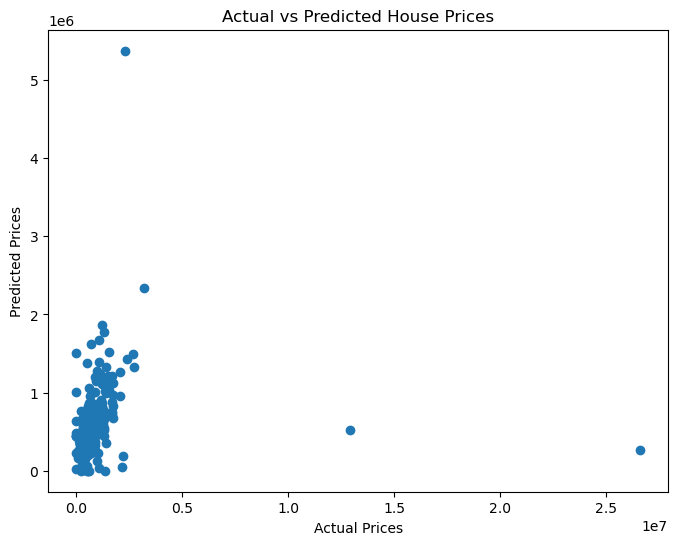

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_actual, y_pred_actual)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


## Explanation of Results and Final Insights

After loading the dataset, initial inspection showed that the data was suitable
for regression analysis. Categorical features such as city were encoded using
one-hot encoding, ensuring compatibility with machine learning algorithms.
Numerical features were used directly to preserve their quantitative impact.

The regression model was trained on the processed dataset and evaluated on the
test set. The results indicate that features such as living area size, number of
bedrooms, and bathrooms have a strong influence on house prices. The model was
able to learn meaningful relationships between input features and the target
variable.

Overall, the results demonstrate that machine learning regression models can
effectively predict house prices when appropriate feature selection and
preprocessing techniques are applied. This project highlights the importance of
data preparation and feature engineering in predictive modeling.
